# Neural Network Project
## Part 1: Data Analysis
Dataset is provided by [Kaggle](https://www.kaggle.com/lodetomasi1995/income-classification/data). Dataset contains two separators (",", ", ") and in some column we can find "?" which is non-standard missing value (for padas library)

### Attributes

**age:** number.<br/>
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br/>
**fnlwgt:** number.<br/>
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br/>
**education-num:** number.<br/>
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br/>
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br/>
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br/>
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br/>
**sex:** Female, Male.<br/>
**capital-gain:** number.<br/>
**capital-loss:** number.<br/>
**hours-per-week:** number.<br/>
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Label

**income:** <=50K, >50K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('income_evaluation.csv', engine='python', sep=r',\s*', na_values=['?'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Orginal dataset conatins 32 561 observation, with some missing values in columns: workclass, occupation, native-country. It has 9 categorical columns and 6 numerical columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning
We start with remove missing values

In [4]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [5]:
data.dropna(inplace=True)

Delete duplicate rows and drop column "fnlwgt", which says about number of units in population which is represented by given record

In [6]:
data_before = data.shape[0]
data = data.drop_duplicates()

print(data_before)
print(data.shape[0])
print("Duplicates removed: {:.2%}".format((data_before - data.shape[0]) / data_before))

30162
30139
Duplicates removed: 0.08%


In [7]:
data.drop(["fnlwgt"], axis=1, inplace=True)

Dataset is imbalanced and contains about 3 times more samples labeled with '<=50K' than '>50K'

<=50K    22633
>50K      7506
Name: income, dtype: int64

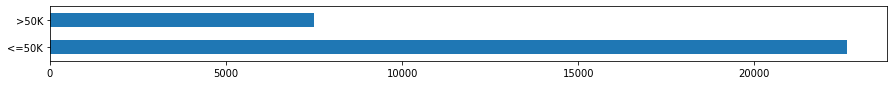

In [8]:
d = data.income.value_counts()
display(d)
d.plot(kind='barh', figsize=(15, 1))
plt.show()

In [9]:
category_data = data.select_dtypes(include=['category']).columns
numerical_data = data.select_dtypes(include=['int64']).columns

### Numerical data

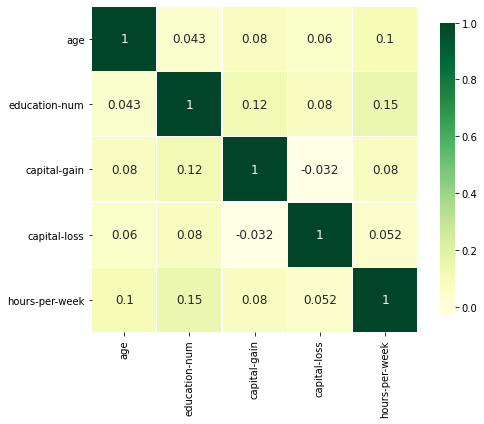

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
sns.heatmap(
    data.corr(), 
    cmap = "YlGn",
    square=True, 
    cbar_kws={'shrink':.9 }, 
    ax=ax,
    annot=True, 
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)
plt.show()

In [11]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,10.122532,1092.841202,88.439928,40.934703
std,13.131426,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


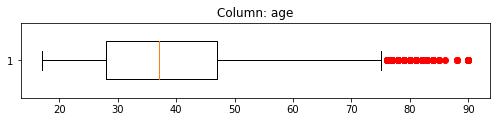

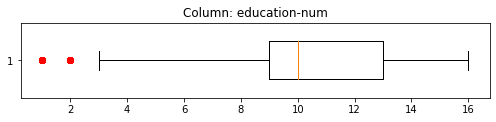

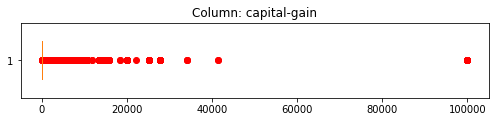

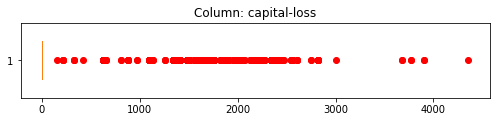

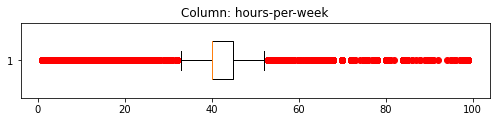

In [12]:
for colname in numerical_data:
    fig = plt.figure(figsize=(7, 3))
    ax = plt.subplot(2, 1, 2)
    
    plt.title('Column: ' + colname)
    ax.boxplot(data[colname], sym='ro', vert=False, widths=[0.5])

    plt.tight_layout()
    plt.show()

Columns **age** and **education-num** are good, but in column **capital-gain** we have outliers equals 9999, which we should drop. In column **capital-loss** there is nothing to drop because of value zero is dominant value, but other data is quite close each other. Column **hours per week** as we would expect most people work 40 hours per week, but here also is nothing to drop, because value are possible and looks correct

In [13]:
colname = 'capital-loss'
data[colname].value_counts(normalize=True) * 100

0       95.265271
1902     0.643684
1977     0.537510
1887     0.514284
1848     0.165898
          ...    
419      0.003318
1411     0.003318
1539     0.003318
2472     0.003318
2467     0.003318
Name: capital-loss, Length: 90, dtype: float64

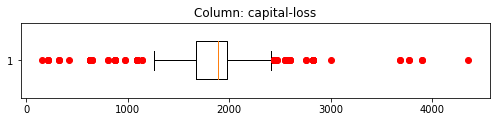

In [14]:
fig = plt.figure(figsize=(7, 3))
ax = plt.subplot(2, 1, 2)
plt.title('Column: ' + colname)
ax.boxplot(data[data['capital-loss']!=0][colname], sym='ro', vert=False, widths=[0.5])
plt.tight_layout()
plt.show()

### Categorical data

In [15]:
def plot_cross_tab(tab1, tab2):
    cross_income = pd.crosstab(data[tab1], data[tab2])
    d = cross_income.div(cross_income.sum(axis=1), axis=0)
    d.sort_values(by='>50K', axis=0, inplace=True)

    ax = d.plot(kind='barh', figsize=(10, 8))
    ax.set_xlabel('Proportion of population')
    plt.show()

#### Income vs Work Class

Only in one work class we can observed that majority earns more than 50K

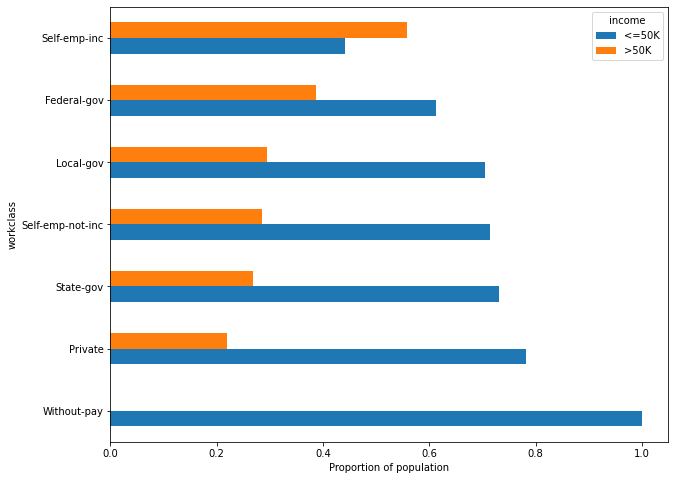

In [16]:
plot_cross_tab("workclass", "income")

#### Income vs Education

As we would expect more educated people more often earn more than 50K in compared to less educated people. Boundary is master degree, because majority of this people earn more than 50K

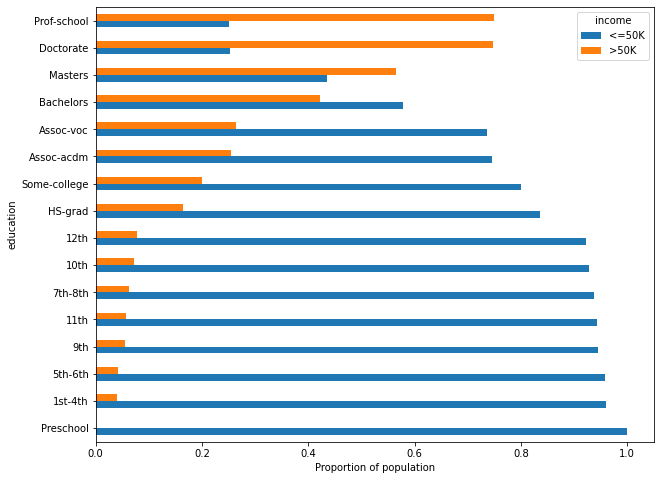

In [17]:
plot_cross_tab("education", "income")

#### Income vs Race

Our dataset is imbalanced so hard to say if some race earn more than 50K often than other. However if we focus on '>50K', we can observed some kind of step function.

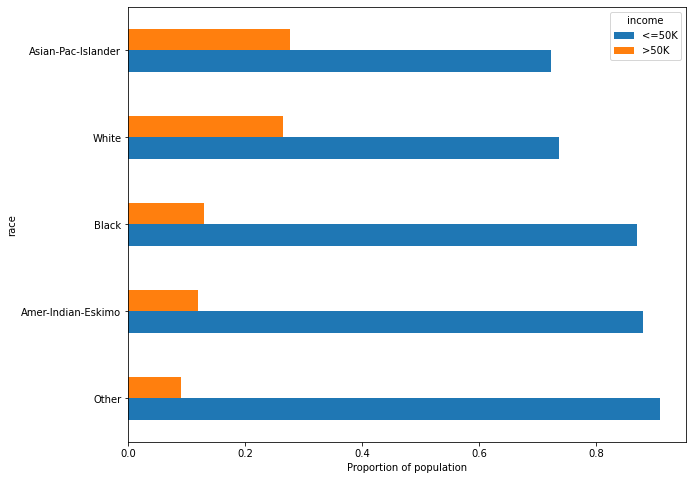

In [18]:
plot_cross_tab("race", "income")

#### Income vs Gender

As we see men more often earn more than 50K in compared to women

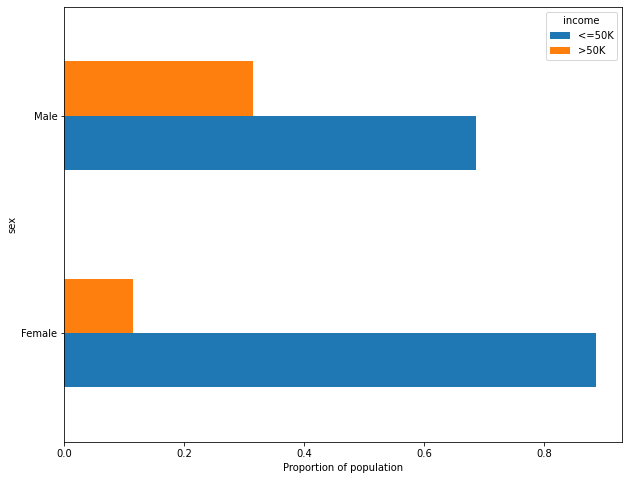

In [19]:
plot_cross_tab("sex", "income")

#### Income vs Occupation

Any of these occupation don't guarantee more than 50K majority, but there are some occupation, which has more chance.

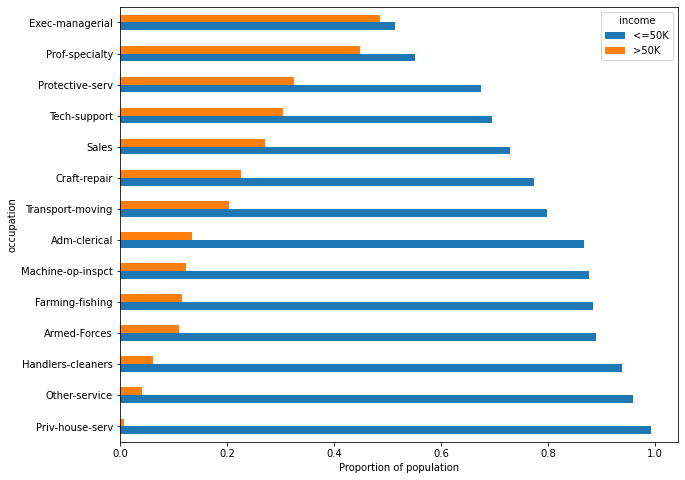

In [20]:
plot_cross_tab("occupation", "income")

#### Income vs native country

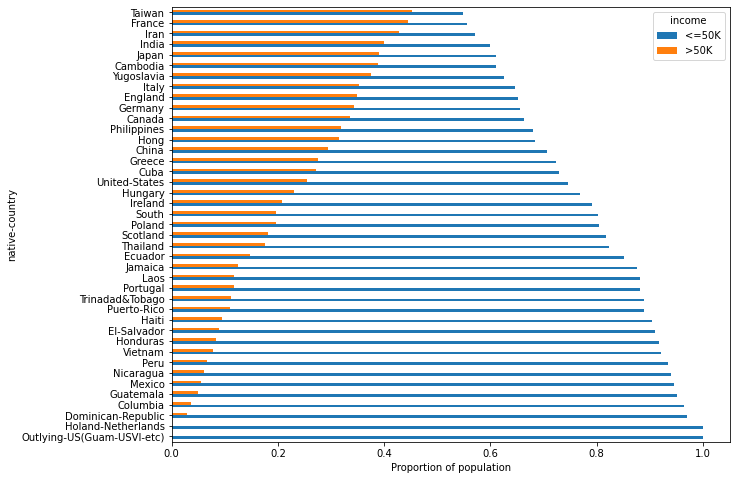

In [21]:
plot_cross_tab("native-country", "income")

#### Income vs relationship

As we see it is valuable to be Wife or Husband

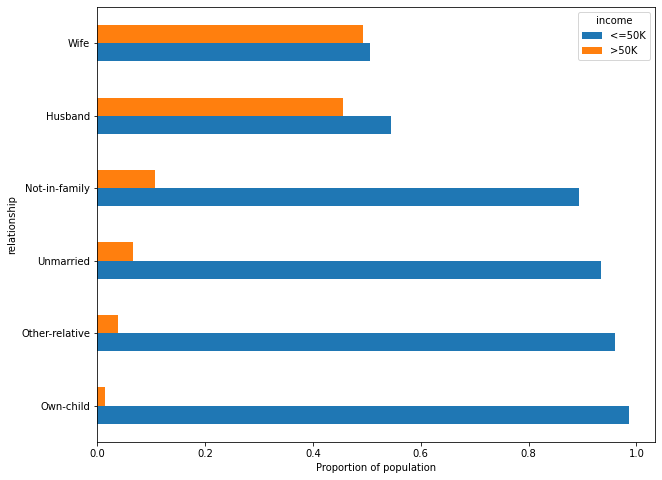

In [22]:
plot_cross_tab("relationship", "income")

#### Income vs marital-status

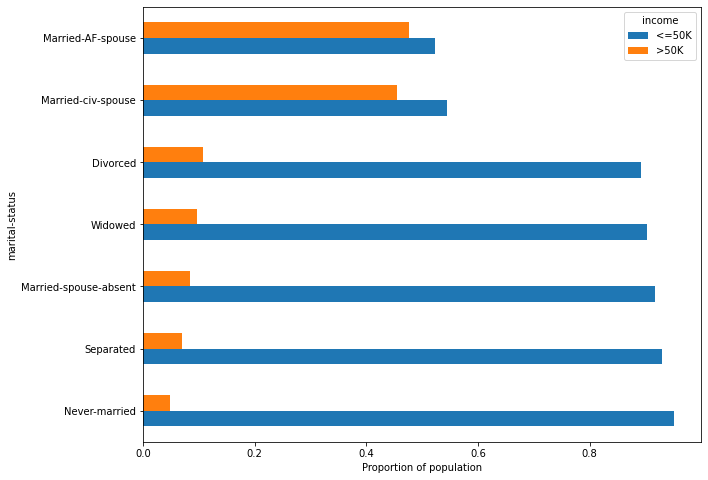

In [23]:
plot_cross_tab("marital-status", "income")

## Data Read Function

In [24]:
def read_dataset(path):
    data = pd.read_csv(path, engine='python', sep=r',\s*', na_values=['?'])
    
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)

    # unnecessary columns
    data.drop(["fnlwgt", "education"], axis=1, inplace=True)
    
    # outliers
    data = data[data["capital-gain"] != 9999]
    
    return data

In [25]:
data = read_dataset('income_evaluation.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64